In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import IBMQ, Aer
from qiskit.compiler import transpile
from main import *

In [3]:
IBMQ.load_account()
provider    = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')
backend     = provider.get_backend('ibm_perth')
simulator   = Aer.get_backend('aer_simulator')

In [4]:
dpmt = device_process_measurement_tomography( backend )
circuits_dpmt = dpmt.circuits()
job = simulator.run( transpile( circuits_dpmt, backend ), shots=2**13 ) 

In [5]:
results_tomography = dpmt.fit( job.result(), paralell=True, gate_set=True )         
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset   

[[ 9.99069685e-01+0.j          9.31059436e-04+0.j        ]
 [-3.65744245e-05-0.00438099j -2.48978019e-04+0.00464415j]
 [-3.65744245e-05+0.00438099j -2.48978019e-04-0.00464415j]
 [ 1.92223270e-05+0.j          1.00035628e+00+0.j        ]]
[[ 9.99069714e-01+0.j          9.31059436e-04+0.j        ]
 [-3.65744251e-05-0.00438099j -2.48978019e-04+0.00464415j]
 [-3.65744251e-05+0.00438099j -2.48978019e-04-0.00464415j]
 [ 1.92223270e-05+0.j          1.00035628e+00+0.j        ]]
[[ 9.99069685e-01+0.j          9.31059436e-04+0.j        ]
 [-3.65744245e-05-0.00438099j -2.48978019e-04+0.00464415j]
 [-3.65744245e-05+0.00438099j -2.48978019e-04-0.00464415j]
 [ 1.92223300e-05+0.j          1.00035628e+00+0.j        ]]
[[ 9.99069685e-01+0.j          9.31059436e-04+0.j        ]
 [-3.65595303e-05-0.00438099j -2.48978019e-04+0.00464415j]
 [-3.65595303e-05+0.00438099j -2.48978019e-04-0.00464415j]
 [ 1.92223259e-05+0.j          1.00035628e+00+0.j        ]]
[[ 9.99069685e-01+0.j          9.31059436e-04+0.j   

In [ ]:
results_single.entropies

[[2.6349413417213543, 2.6357367226439834],
 [2.633070845030089, 2.6375873282668625],
 [2.639079067914717, 2.631595470637648],
 [2.6282999580285016, 2.6422394985383972],
 [2.6368680728652096, 2.633786998357889],
 [2.6355284922170155, 2.6351705243628154],
 [2.6360166662000375, 2.6346886804365988]]

In [ ]:
results_single.funs

[[2.6345818896619324, 2.635808854281596],
 [2.6315497048058667, 2.639053552920884],
 [2.635645454010984, 2.63037355515389],
 [2.6229510781376515, 2.6476862821973643],
 [2.630721006561505, 2.6368785239218413],
 [2.636872928304617, 2.6335045572302582],
 [2.635994981665102, 2.63463139407978]]

In [ ]:
DeltaL = 2**13*( np.sum(np.array(results_single.entropies)[:,1:],1) 
                - np.sum(np.array(results_single.funs)[:,1:],1) )
DeltaL[DeltaL<0] = 0
DeltaN = 4  
lambda_4 = abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN )  
DeltaN = 1
lambda_1 = abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) 

plt.plot( range(7), lambda_1, '--o',label='$k$=1')
plt.plot( range(7), lambda_4, '--o',label='$k$=4')
plt.hlines( 5, -0.1, 6.1, color='black', linestyles='dashed', label='$\lambda=1$'  )
plt.legend()
plt.xlabel('qubit')
plt.ylabel('$\lambda$')

NameError: name 'results_single' is not defined

Text(0, 0.5, '$\\lambda$')

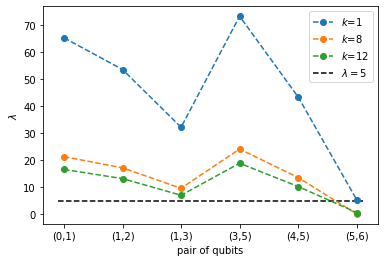

In [ ]:
DeltaL = np.abs([ 2**13*( np.sum(np.array(results_double[k].entropies)[:,1:],1) 
                - np.sum(np.array(results_double[k].funs)[:,1:],1) ) for k in range(3) ])
DeltaL[DeltaL<0] = 0
DeltaN = 12
lambda_12 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()
DeltaN = 1
lambda_1 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()
DeltaN = 8
lambda_8 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()

Idx = [3,4,0,2,1,5]
plt.plot( range(6), lambda_1[Idx], '--o',label='$k$=1')
plt.plot( range(6), lambda_8[Idx], '--o',label='$k$=8')
plt.plot( range(6), lambda_12[Idx], '--o',label='$k$=12')
plt.hlines( 5, -0.1, 5.1, color='black', linestyles='dashed', label='$\lambda=5$'  )
plt.xticks( range(6), labels=[ '(0,1)', '(1,2)', '(1,3)', '(3,5)', '(4,5)', '(5,6)' ] )
plt.legend()
plt.xlabel('pair of qubits')
plt.ylabel('$\lambda$')